<a href="https://colab.research.google.com/github/sheldonwuhung/MTA-MHC-Datathon/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #import numpy library as np
import pandas as pd # importing pandas and using an acronym
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

MTASET = pd.read_csv("https://data.ny.gov/resource/kh8p-hcbm.csv", na_values="?") #defines DF as pandas read function for CSV
MTASET

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,2025-08-20T23:12:08.000,2025-08-21T00:24:08.000,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,2025-08-20T23:48:59.000,2025-08-20T23:54:47.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,2025-08-20T22:33:13.000,2025-08-20T23:56:02.000,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,2025-08-20T22:50:45.000,2025-08-20T23:32:43.000,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,2025-08-20T10:52:57.000,2025-08-20T11:16:57.000,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,489631873,53e914247c7ca545d1c6c48c0aca7aac0ecbfbd91d50ea...,2025-08-21T16:51:45.000,2025-08-21T16:56:17.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,M2,40.758956,-73.976984,450123,5 AV/W 50 ST,40.758880,-73.977029,POINT (-73.97698388774229 40.758956173264124),POINT (-73.977029 40.75888)
996,489631640,e1c6c4919b88e30bfca93a9d0362da030fd322d74d54a5...,2025-08-20T23:15:40.000,2025-08-20T23:26:11.000,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,M4,40.826842,-73.950333,400658,BROADWAY/W 150 ST,40.829398,-73.948497,POINT (-73.95033251074187 40.82684161216622),POINT (-73.948497 40.829398)
997,489631472,5dac2e768375b59c4f3da6bf45775cd9fbb72c8cbe6357...,2025-08-21T16:06:06.000,2025-08-21T16:25:06.000,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,M2,40.790036,-73.952031,404191,MADISON AV/E 95 ST,40.786932,-73.954292,POINT (-73.95203062978655 40.790036083928236),POINT (-73.954292 40.786932)
998,489631458,ab5f2f1af71bf83c9fe79561354102aa441dd408576a2a...,2025-08-21T16:12:22.000,2025-08-21T16:22:55.000,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,M2,40.802721,-73.953030,400287,ADAM C POWELL BLVD/W 116 ST,40.803591,-73.952433,POINT (-73.95303000277217 40.80272074212583),POINT (-73.952433 40.803591)


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='bus_stop_latitude', ylabel='bus_stop_longitude'>

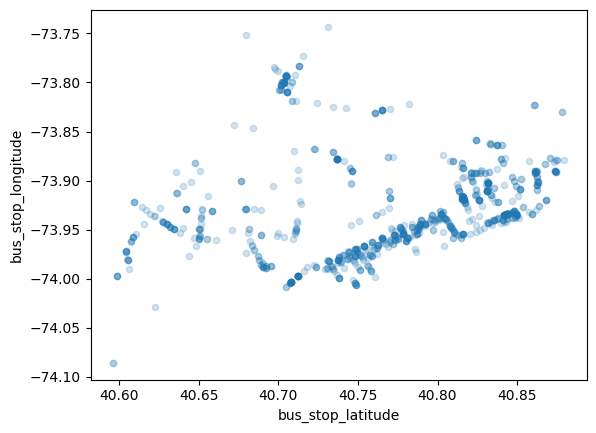

In [ ]:
MTASET.plot.scatter(x='bus_stop_latitude' , y='bus_stop_longitude', alpha = 0.2,colormap=plt.get_cmap('hsv') ) #jet is one type of matplotlib colormap

<Axes: xlabel='violation_latitude', ylabel='violation_longitude'>

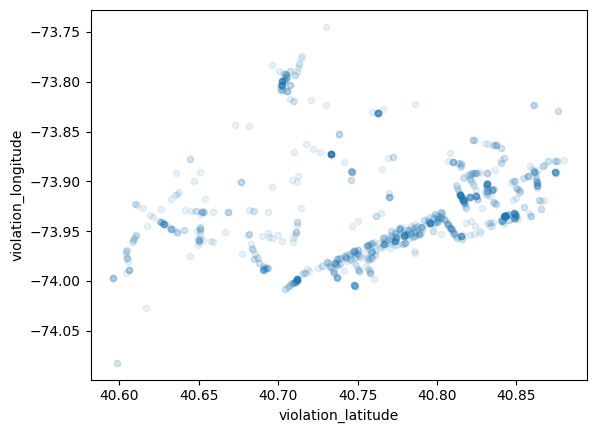

In [ ]:
MTASET.plot.scatter(x= "violation_latitude", y="violation_longitude",alpha = 0.1)

In [1]:
"""
Map all MTA bus stops (from GTFS static) on an interactive Folium map.

What this script does:
1) Reads every GTFS ZIP in ./bus_gtfs (e.g., gtfs_m.zip, gtfs_q.zip, ...).
2) Extracts stops.txt from each ZIP and combines them into one table.
3) Converts (lon, lat) to point geometry (EPSG:4326).
4) Plots ALL stops as tiny dots on a Folium map you can pan/zoom.

Notes for students:
- GTFS "stops.txt" has stop_id, stop_name, stop_lat, stop_lon.
- EPSG:4326 means "latitude/longitude (WGS84)" — the usual map coords.
- If the map feels slow with *all* stops visible: lower the dot size or filter.
"""

from pathlib import Path
import zipfile
import webbrowser
import pandas as pd
import geopandas as gpd
import folium

# If any packages or modules are missing, do pip install packagename
# (Ex: pip install geopandas) in any cell or in Bash/PowerShell

### Download all bus gtfs zipped files from https://www.mta.info/developers
### and add them to a folder in your working directory named "bus_gtfs"
FOLDER = Path("./bus_gtfs")  # or change to another working path
print("FOLDER exists?", FOLDER.exists())

zip_paths = sorted(FOLDER.glob("gtfs_*.zip"))
print("Found ZIPs:", [p.name for p in zip_paths])
assert zip_paths, f"No GTFS zips found in {FOLDER}/gtfs_*.zip"

# Read stops.txt from each ZIP and combine
frames = []
for zp in zip_paths:
    with zipfile.ZipFile(zp) as z:
        if "stops.txt" not in z.namelist():
            print(f"[WARN] stops.txt missing in {zp.name}")
            continue
        df = pd.read_csv(z.open("stops.txt"), dtype=str, low_memory=False)
        df["borough_feed"] = zp.stem  # to remember which ZIP it came from
        frames.append(df)

assert frames, "No stops.txt found in any ZIP."
stops = pd.concat(frames, ignore_index=True)

# Basic cleanup: drop bad lat/lon rows, cast to float
stops = stops.dropna(subset=["stop_lat", "stop_lon"])
stops["stop_lat"] = stops["stop_lat"].astype(float)
stops["stop_lon"] = stops["stop_lon"].astype(float)

# Drop duplicates for stop_id that shows up in multiple zips
# keep one row per location:
stops = stops.drop_duplicates(subset=["stop_id", "stop_lat", "stop_lon"])

# Create stops GeoDataFrame
stops_gdf = gpd.GeoDataFrame(
    stops[["stop_id", "stop_name", "stop_lat", "stop_lon"]],
    geometry=gpd.points_from_xy(stops["stop_lon"], stops["stop_lat"]),
    crs="EPSG:4326"
)
print(f"Total stops: {len(stops_gdf):,}")

# Create base folium  map
folium_map = folium.Map(tiles="cartodbpositron", zoom_start=11, prefer_canvas=True)

# Fit to stops bounds
minx, miny, maxx, maxy = stops_gdf.total_bounds
folium_map.fit_bounds([[miny, minx], [maxy, maxx]])
folium.map.CustomPane("stops",  z_index=650).add_to(folium_map)

# Add stops as raw dots
stops_raw = folium.FeatureGroup(name="Stops (dots)", show=True)
for _, s in stops_gdf.iterrows():
    folium.CircleMarker(
        location=[s["stop_lat"], s["stop_lon"]],
        radius=1.8,
        # color="#111",
        fill=True,
        fill_opacity=0.8,
        opacity=0.8,
        tooltip=f"{s.get('stop_name','')} (ID: {s.get('stop_id','')})"
    ).add_to(stops_raw)

stops_raw.add_to(folium_map)
folium.LayerControl(collapsed=False).add_to(folium_map)

# Save and open in your browser
out = Path("mta_bus_map.html").resolve()
folium_map.save(str(out))
print(f"Wrote {out}")
webbrowser.open(out.as_uri(), new=2)



FOLDER exists? False
Found ZIPs: []


AssertionError: No GTFS zips found in bus_gtfs/gtfs_*.zip